# Optimization For Vendor Delivery Services

In [1]:
import pandas as pd
!pip install matplotlib
import matplotlib.pyplot as plt

# Loading the dataset
data = pd.read_csv('ShreeSaiFacilities_Dataset.csv')
print(data.head())


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   SNO BRANCH   MONTH  Employees  MANDAYS   WAGES     SALARY        BASIC  \
0  1.0    FAR  Apr-22       23.0      595  538.46  320383.70  214657.0790   
1  NaN    NaN  May-22       21.0      550  538.46  296153.00  198422.5100   
2  NaN    NaN  Jun-22       27.0      695  538.46  374229.70  250733.8990   
3  NaN    NaN  Jul-22       30.0      777  538.46  418383.42  280316.8914   
4  NaN    NaN  Aug-22       28.0      734  538.46  395229.64  264803.8588   

            PF        ESIC  ...  PACKETS  RATES     AMOUNT   COD  COD RATE  \
0  54973.67793  12815.3480  ...    38777  16.28  631289.56  3675         5   
1  50816.00481  11846.1200  ...    35831  16.28  583328.68  2643         5   
2  64212.95153  14969.1880  ...    40725  16.28  663003.00  3157         5   
3  71789.15589  16735.3368  ...    41633  16.28  677785.24  4077         5   
4  67816.26824  15809.1856  ...    41779  16.28  680162.12  4118         5   

   AMOUNT.1    BILLING          GST       T BILL       GPROFIT  
0  

### as we can see above the data tells us about monthly ongoings in a branch, including what expenses are occured and profit gained in that particular month.

In [2]:
df = pd.DataFrame(data)
df = df.fillna(method='ffill')
print(df)

    SNO BRANCH   MONTH  Employees  MANDAYS   WAGES     SALARY        BASIC  \
0   1.0    FAR  Apr-22       23.0      595  538.46  320383.70  214657.0790   
1   1.0    FAR  May-22       21.0      550  538.46  296153.00  198422.5100   
2   1.0    FAR  Jun-22       27.0      695  538.46  374229.70  250733.8990   
3   1.0    FAR  Jul-22       30.0      777  538.46  418383.42  280316.8914   
4   1.0    FAR  Aug-22       28.0      734  538.46  395229.64  264803.8588   
..  ...    ...     ...        ...      ...     ...        ...          ...   
75  4.0    RMR  Jul-23       14.0      375  642.50  240937.50  161428.1250   
76  4.0    RMR  Aug-23       14.0      374  642.50  240295.00  160997.6500   
77  4.0    RMR  Sep-23       14.0      369  642.50  237082.50  158845.2750   
78  4.0    RMR  Oct-23       15.0      382  642.50  245435.00  164441.4500   
79  4.0    RMR  Nov-23       14.0      374  642.50  240295.00  160997.6500   

             PF        ESIC  ...  PACKETS  RATES     AMOUNT   C

C:\Users\Asus\AppData\Local\Temp\ipykernel_29544\3249782190.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [3]:

data = df.drop('SNO',axis=1)
data2 = data.drop('INCENTIVE',axis=1)


#print(data.describe())

# Descriptive statistics for all columns
print(data2.describe(include='all'))

       BRANCH   MONTH  Employees     MANDAYS       WAGES         SALARY  \
count      80      80  80.000000   80.000000   80.000000      80.000000   
unique      4      20        NaN         NaN         NaN            NaN   
top       FAR  Apr-22        NaN         NaN         NaN            NaN   
freq       20       4        NaN         NaN         NaN            NaN   
mean      NaN     NaN  17.198750  446.637500  619.005125  270856.205250   
std       NaN     NaN   5.140047  133.723808   46.458224   58147.580675   
min       NaN     NaN  10.000000  269.000000  538.460000  172832.500000   
25%       NaN     NaN  14.000000  360.250000  627.707500  234351.875000   
50%       NaN     NaN  15.000000  383.500000  642.500000  247362.500000   
75%       NaN     NaN  19.500000  520.000000  642.500000  314056.795000   
max       NaN     NaN  31.000000  816.000000  696.040000  439383.360000   

                BASIC            PF          ESIC           FUEL  ...  \
count       80.000000     

In [4]:
print(data2['GPROFIT'].describe())

count        80.000000
mean      57355.169850
std       36972.229449
min      -42135.898430
25%       40378.109082
50%       53699.854030
75%       72134.606207
max      186653.027700
Name: GPROFIT, dtype: float64


In [5]:
print(data2['BRANCH'].unique().tolist())

['FAR', 'OKHLA', 'JIA', 'RMR']


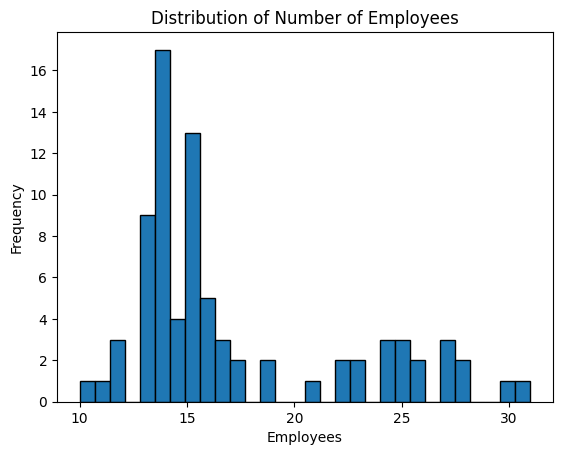

In [6]:
plt.hist(df['Employees'], bins=30, edgecolor='black')
plt.title('Distribution of Number of Employees')
plt.xlabel('Employees')
plt.ylabel('Frequency')
plt.show()

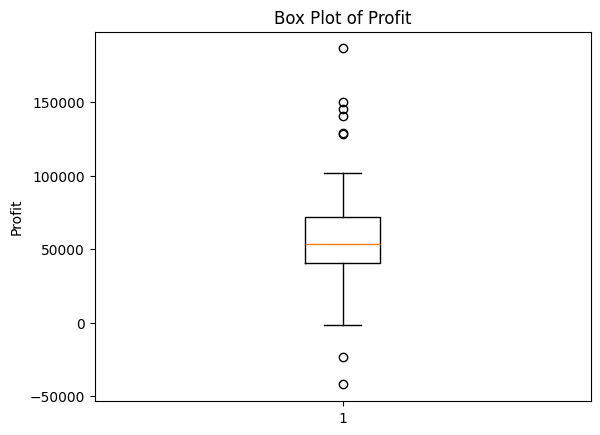

In [7]:
plt.boxplot(df['GPROFIT'])
plt.title('Box Plot of Profit')
plt.ylabel('Profit')
plt.show()

In [8]:
num_data = data2.select_dtypes(include='number')
corr = num_data.corr()
print(corr)

           Employees   MANDAYS     WAGES    SALARY     BASIC        PF  \
Employees   1.000000  0.998583 -0.912053  0.984325  0.984325  0.984325   
MANDAYS     0.998583  1.000000 -0.915204  0.985246  0.985246  0.985246   
WAGES      -0.912053 -0.915204  1.000000 -0.835844 -0.835844 -0.835844   
SALARY      0.984325  0.985246 -0.835844  1.000000  1.000000  1.000000   
BASIC       0.984325  0.985246 -0.835844  1.000000  1.000000  1.000000   
PF          0.984325  0.985246 -0.835844  1.000000  1.000000  1.000000   
ESIC        0.984325  0.985246 -0.835844  1.000000  1.000000  1.000000   
FUEL        0.990884  0.992007 -0.926647  0.968774  0.968774  0.968774   
SUP         0.927009  0.929173 -0.979217  0.861160  0.861160  0.861160   
EXPENSES    0.995597  0.996709 -0.884897  0.994405  0.994405  0.994405   
PACKETS     0.856638  0.855140 -0.860819  0.810034  0.810034  0.810034   
RATES       0.540888  0.549646 -0.387313  0.602881  0.602881  0.602881   
AMOUNT      0.956973  0.959550 -0.9038

In [9]:
num_data = data2.select_dtypes(include='number')
num_data[['Employees','PACKETS','EXPENSES','BILLING','GPROFIT']].corr()

,Employees,PACKETS,EXPENSES,BILLING,GPROFIT
Employees,1.000000,0.856638,0.995597,0.960413,0.392401
PACKETS,0.856638,1.000000,0.843270,0.910701,0.652146
EXPENSES,0.995597,0.843270,1.000000,0.959536,0.377283
BILLING,0.960413,0.910701,0.959536,1.000000,0.622792
GPROFIT,0.392401,0.652146,0.377283,0.622792,1.000000



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


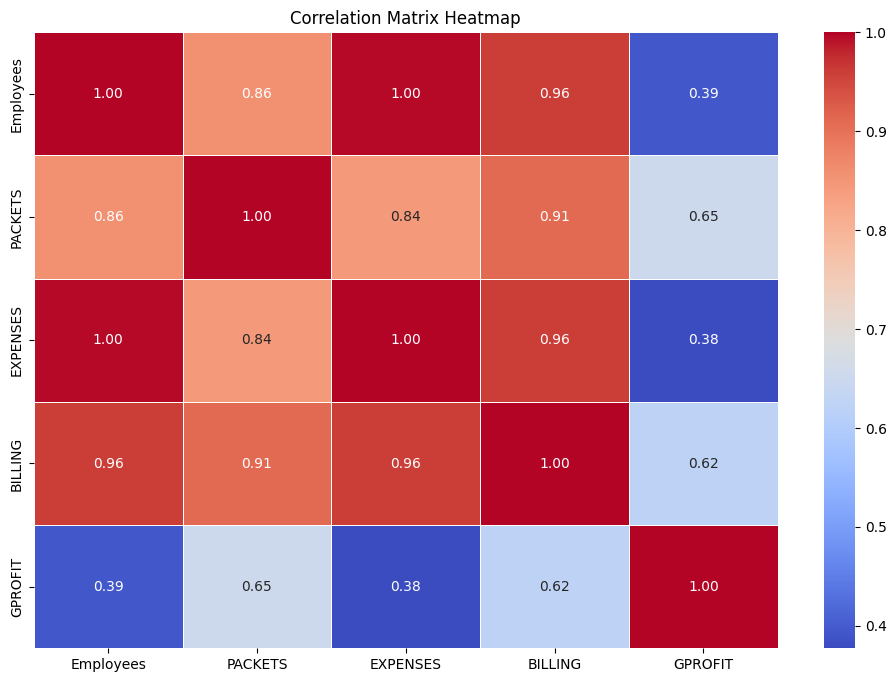

In [10]:
!pip install seaborn
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(num_data[['Employees','PACKETS','EXPENSES','BILLING','GPROFIT']].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

ValueError: Format specifier missing precision

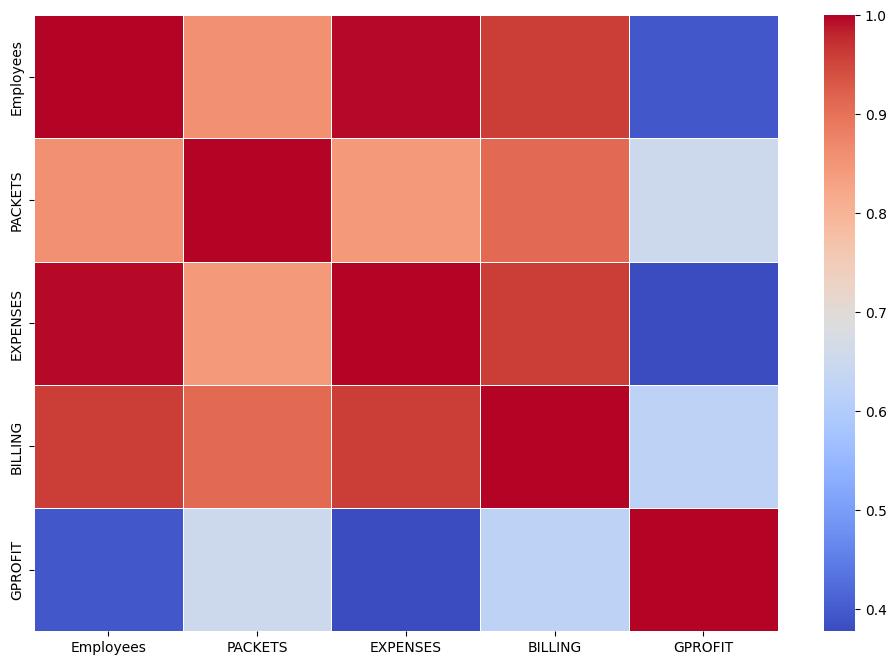

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(num_data[['Employees','PACKETS','EXPENSES','BILLING','GPROFIT']].corr(), annot=True, cmap='coolwarm', fmt=".a2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

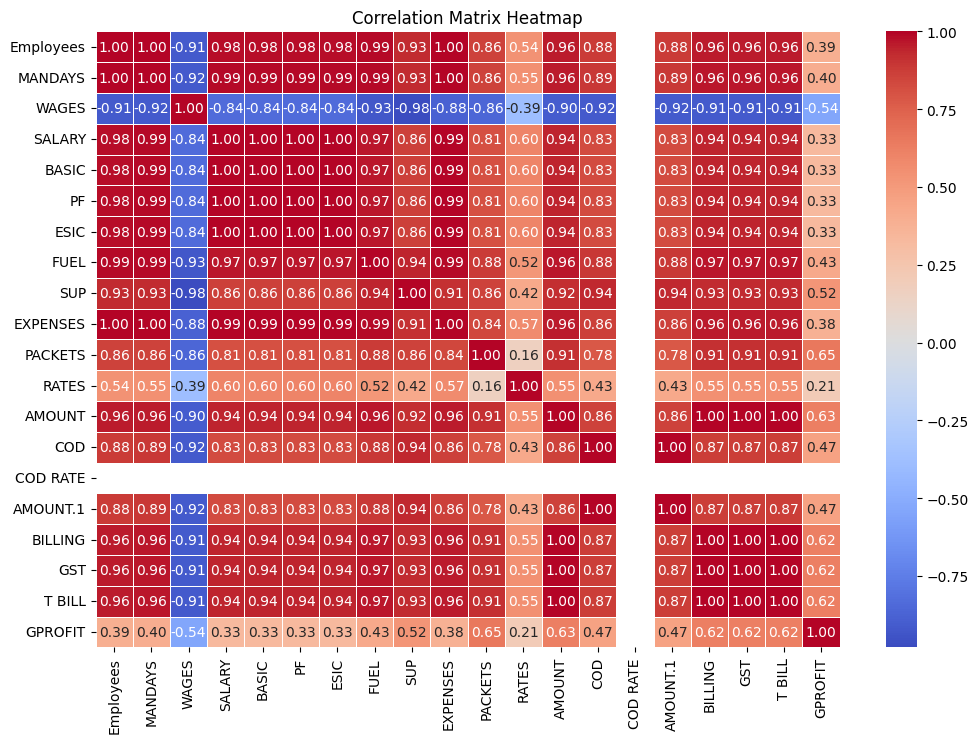

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

(0.0, 198092.4740065)

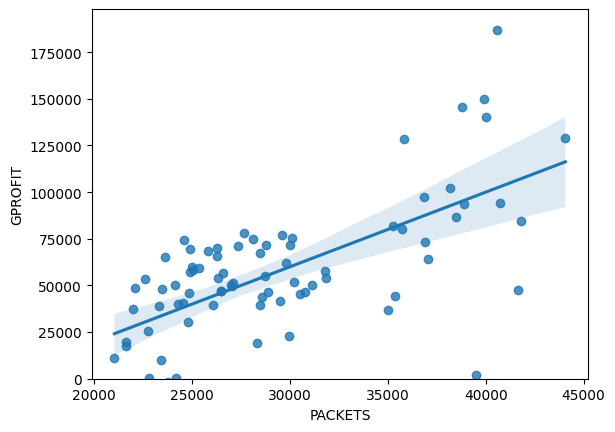

In [13]:
sns.regplot(x="PACKETS", y="GPROFIT", data=num_data)
plt.ylim(0,)

In [ ]:
# !pip install scikit-learn
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.preprocessing import StandardScaler

# # Assuming 'GPROFIT' is the target variable
# features = ['Employees', 'PACKETS']
# X = num_data[features]  # Features
# y = num_data['GPROFIT']  # Target variable

# # Data preprocessing - standardize numerical features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# maxx=0
# max_i = 0
# # Train-test split
# for i in range(100000):
    
#     X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=i)

#     # Create and train the model
#     model1 = LinearRegression()
#     model1.fit(X_train, y_train)

#     # Make predictions
#     y_pred = model1.predict(X_test)
#     #print(X_train)
#     # Model evaluation
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
#     if r2>maxx:
#         maxx=r2
#         max_i = i

# #print(f'Mean Squared Error: {mse}')
# print(f'R-squared max: {maxx}')
# print(f'max i: {max_i}')

# # print("hi")

# # #y_pred = model.predict('12','4000')

In [ ]:
# to Predict GProfit

# R-squared max: 0.8154168790323141
# max i: 5257
# R-squared max: 0.8441157592935701
# max i: 44128    
    
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming 'GPROFIT' is the target variable
features = ['Employees', 'PACKETS']
X = num_data[features]  # Features
y = num_data['GPROFIT']  # Target variable

# Data preprocessing - standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=44128)

# Create and train the model
model2 = LinearRegression()
model2.fit(X_train, y_train)

# Make predictions
y_pred = model2.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

In [ ]:
new_data = [[20, 40600]]  # Replace these values with your own

# Standardize the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Make predictions using the trained model
predicted_profit = model.predict(new_data_scaled)

print(f'Predicted GPROFIT: {predicted_profit[0]}')

In [28]:
# to predict number of employees from given number of packets to maximize profit

import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Assuming 'GPROFIT' is the target variable
target_variable = 'GPROFIT'

# Features to use for prediction
feature_to_predict = 'Employees'
feature_for_prediction = 'PACKETS'

# Extract the relevant columns
X = num_data[[feature_for_prediction]]
y = num_data[feature_to_predict]

# Data preprocessing - standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (you might need to choose an appropriate split ratio)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=5527)

# Create and train the model
model3 = LinearRegression()
model3.fit(X_train, y_train)

#joblib.dump(model3,'predict_emp.sav')
joblib.dump(model3,'predict_emp.pkl')

joblib.dump(scaler, 'predict_emp_scaler.pkl')

# Make predictions for new data
new_data = [[40000]]  # Replace with the actual 'Packets' value for prediction
new_data_scaled = scaler.transform(new_data)

predicted_employees = model3.predict(new_data_scaled)

print(f"Predicted Employees for new data: {predicted_employees[0]}")

Predicted Employees for new data: 24.23452616520283


C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# To predict number of packets from given number of employees to maximize profit

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Assuming 'GPROFIT' is the target variable
target_variable = 'GPROFIT'

# Features to use for prediction
feature_to_predict = 'PACKETS'
feature_for_prediction = 'Employees'

# Extract the relevant columns
X = num_data[[feature_for_prediction]]
y = num_data[feature_to_predict]

# Data preprocessing - standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (you might need to choose an appropriate split ratio)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)
model.save('predict_data.sav')

# Make predictions for new data
new_data = [[22]]  # Replace with the actual 'Packets' value for prediction
new_data_scaled = scaler.transform(new_data)

predicted_employees = model.predict(new_data_scaled)

print(f"Predicted Packets for given number of employees : {predicted_employees[0]}")

In [29]:
pip show joblib


Name: joblibNote: you may need to restart the kernel to use updated packages.

Version: 1.3.2
Summary: Lightweight pipelining with Python functions
Home-page: 
Author: 
Author-email: Gael Varoquaux <gael.varoquaux@normalesup.org>
License: BSD 3-Clause
Location: c:\users\asus\appdata\local\programs\python\python310\lib\site-packages
Requires: 
Required-by: scikit-learn
